<a href="https://colab.research.google.com/github/poojaneuusa/Image-Processing-Projects/blob/main/Text_to_Image_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

model = SentenceTransformer('clip-ViT-B-32')

!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

!unzip 'unsplash-25k-photos.zip' -d 'photos'

img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

img_names[0]

img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

img_folder = '/photos'

def search(query, k=3):
  query_emd = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

  hits = util.semantic_search(query_emd, img_embed, top_k=k)[0]
  print(hits)

  print("Query: ", query)
  for hit in hits:
    img_path = img_names[hit['corpus_id']]
    print(img_path)

    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

search('man on the mountain')


[{'corpus_id': 1756, 'score': 1.0}, {'corpus_id': 1764, 'score': 0.9140019416809082}, {'corpus_id': 1392, 'score': 0.9036898612976074}]
Query:  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x959 at 0x7F0AC8922050>
photos/2MG9GP29gMM.jpg


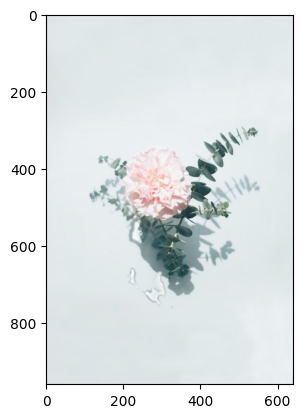

photos/qgkK0dWOhdY.jpg


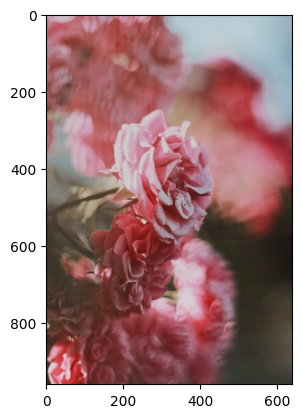

photos/KWvhJuC3TSI.jpg


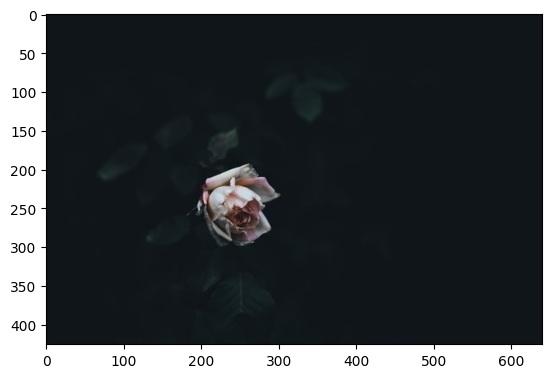

In [ ]:
Image.open(img_names[1232])
search(Image.open(img_names[1756]))

[{'corpus_id': 1889, 'score': 0.29119229316711426}, {'corpus_id': 117, 'score': 0.2802831530570984}, {'corpus_id': 309, 'score': 0.2741173803806305}]
Query:  cute dogs
photos/yCKKd37OsgI.jpg


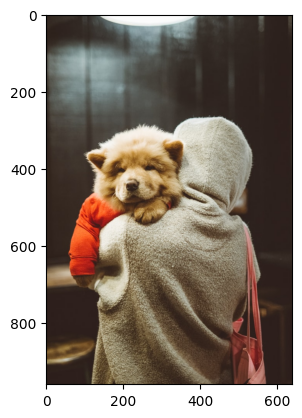

photos/NYuUoKjJR-c.jpg


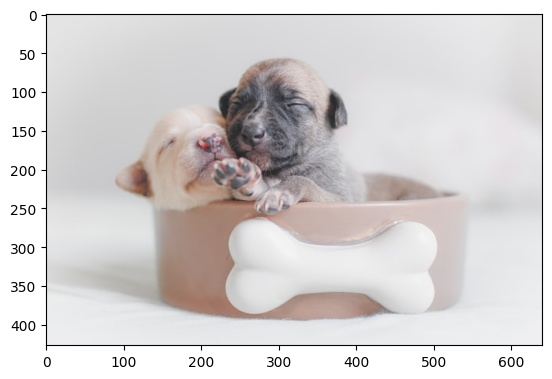

photos/U8pgck1dgtQ.jpg


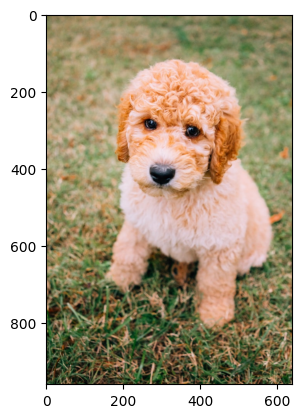

In [ ]:
search('cute dogs')